# Neccessary Libraries :

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import random
from skimage import draw
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten

## Initializing Parameters :

In [10]:
total_images = 20000
image_size = 100
min_object_size = 2
max_object_size = 6
num_object = 1

In [37]:
bbox = np.zeros((total_images, num_object, 4))
images = np.zeros((total_images, image_size, image_size))
noise = 0.5 #(random.randint(4,9))/10
images+= noise * np.random.rand(*images.shape)
images.shape

(20000, 100, 100)

In [38]:
def make_circle(w):
    random_val = random.randint(w,w)
    ar = np.zeros((random_val,random_val))#, dtype=np.uint8)
    rr,cc = draw.circle_perimeter(ar.shape[0]//2,ar.shape[0]//2, (ar.shape[0]//2)-1)
    ar[rr,cc] = 0.25
    ar+=noise * np.random.rand(*ar.shape)
    return ar

In [39]:
for img in range(total_images):
    
    w = np.random.randint(min_object_size, max_object_size)*10
    h = w
    x = np.random.randint(0, image_size - w)
    y = np.random.randint(0, image_size - h)
    images[img, x:x+w, y:y+h] = make_circle(w)
    bbox[img, 0] = [x, y, w, h]

## Demo

#### Noisy demo :

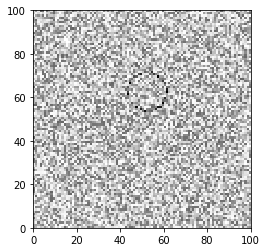

In [40]:
plt.imshow(images[0].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, image_size, 0, image_size])

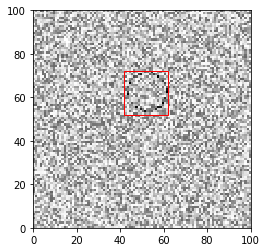

In [41]:
plt.imshow(images[0].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, image_size, 0, image_size])
plt.gca().add_patch(matplotlib.patches.Rectangle((bbox[0][0][0], bbox[0][0][1]), bbox[0][0][2], bbox[0][0][3], ec='r', fc='none'))

## Data Split :

In [42]:
y = bbox.reshape(total_images,-1) / image_size
x = (images.reshape(total_images, image_size, image_size) - np.mean(images)) / np.std(images)
x = x.reshape(total_images,image_size,image_size,1)
i = int(0.9 * total_images)
x_train = x[:i]
y_train = y[:i]
x_test = x[i:]
y_test = y[i:]
test_box = bbox[i:]
test_images = images[i:]

#### training data << 2,00,000

## Neural Net Architecture :

In [43]:
model = Sequential()
#=======================================================================================================================#
model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu', input_shape = (image_size,image_size,1)))
model.add(Conv2D(filters=32, kernel_size = (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#=======================================================================================================================#
model.add(Conv2D(filters=64, kernel_size = (7,7), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size = (7,7),  activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#=======================================================================================================================#
model.add(Conv2D(filters=64, kernel_size = (9,9), padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size = (9,9), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
#=======================================================================================================================#
model.add(Flatten())
#=======================================================================================================================#
model.add(Dense(400, activation='relu'))
# model.add(Dropout(0.5))
#=======================================================================================================================#
model.add(Dense(32, activation='relu'))
# model.add(Dropout(0.5))
#=======================================================================================================================#
model.add(Dense(4))

## < 2 Million parameter :

In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 48, 48, 64)        100416    
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 42, 42, 64)        200768    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 21, 21, 64)       

## Learning Rate Reduction :

In [45]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.5, min_lr=0.00001)

# Model Fitting :

In [46]:
model.compile(optimizer='adam', loss='mse')
model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test),verbose=2,batch_size=64, callbacks=[learning_rate_reduction])

Epoch 1/30
282/282 - 8s - loss: 0.0290 - val_loss: 0.0072
Epoch 2/30
282/282 - 7s - loss: 0.0037 - val_loss: 0.0011
Epoch 3/30
282/282 - 7s - loss: 7.3153e-04 - val_loss: 4.1121e-04
Epoch 4/30
282/282 - 7s - loss: 3.6147e-04 - val_loss: 5.6057e-04
Epoch 5/30
282/282 - 7s - loss: 2.7661e-04 - val_loss: 1.7789e-04
Epoch 6/30
282/282 - 7s - loss: 1.7955e-04 - val_loss: 1.3555e-04
Epoch 7/30
282/282 - 7s - loss: 1.6783e-04 - val_loss: 1.4838e-04
Epoch 8/30
282/282 - 7s - loss: 1.1706e-04 - val_loss: 1.1318e-04
Epoch 9/30
282/282 - 7s - loss: 9.7460e-05 - val_loss: 9.3093e-05
Epoch 10/30
282/282 - 7s - loss: 9.1069e-05 - val_loss: 7.3733e-05
Epoch 11/30
282/282 - 7s - loss: 9.1756e-05 - val_loss: 1.1096e-04
Epoch 12/30
282/282 - 7s - loss: 6.8038e-05 - val_loss: 1.6969e-04
Epoch 13/30
282/282 - 7s - loss: 7.2956e-05 - val_loss: 5.7472e-05
Epoch 14/30
282/282 - 7s - loss: 5.5393e-05 - val_loss: 4.6334e-05
Epoch 15/30
282/282 - 7s - loss: 4.9398e-05 - val_loss: 7.7719e-05
Epoch 16/30
282/282 

## Prediction :

In [47]:
y_pred = model.predict(x_test)
bbox_pred = y_pred * image_size
bbox_pred = bbox_pred.reshape(len(bbox_pred), num_object, -1)

In [48]:
def IOU(bbox1, bbox2):
    '''Calculate overlap between two bounding boxes [x, y, w, h] as the area of intersection over the area of unity'''
    x1, y1, w1, h1 = bbox1[0], bbox1[1], bbox1[2], bbox1[3]
    x2, y2, w2, h2 = bbox2[0], bbox2[1], bbox2[2], bbox2[3]

    w_i = min(x1 + w1, x2 + w2) - max(x1, x2)
    h_i = min(y1 + h1, y2 + h2) - max(y1, y2)
    if w_i <= 0 or h_i <= 0:  # no overlap
#         w_I = abs(w_i)
#         h_I = abs(h_i)
        return 0
    I = w_i * h_i

    U = w1 * h1 + w2 * h2 - I

    return I / U

## Polygon for Circle :

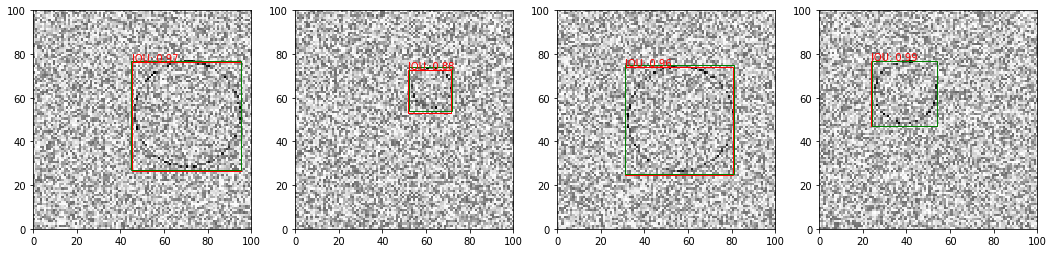

In [55]:
plt.figure(figsize=(18, 12))
for i_subplot in range(1, 5):
    plt.subplot(1, 4, i_subplot)
    i = np.random.randint(len(x_test))
    plt.imshow((test_images)[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, image_size, 0, image_size])
    for pred_bbox, exp_bbox in zip(bbox_pred[i], test_box[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.gca().add_patch(matplotlib.patches.Rectangle((exp_bbox[0], exp_bbox[1]), exp_bbox[2], exp_bbox[3], ec='g', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1]+pred_bbox[3]+0.2), color='r')

In [56]:
summed_IOU = 0.
for pred_bbox, test_bbox in zip(bbox_pred.reshape(-1, 4), test_box.reshape(-1, 4)):
    summed_IOU += IOU(pred_bbox, test_bbox)
mean_IOU = summed_IOU / len(bbox_pred)
mean_IOU

0.9603336493369152

## Problem Definition :

#### Here, model takes image (size=100,100) of noisy image consist circle at random place and of random size. Output of the model will be coordinates of polygon(rectangle) as per the problem statement of Bounding Box Design.



#### **Solution** : In this problem, circle has been created inside the rectangular box of random size at random location in image.

#### **feature** : In this problem, image consist of circle inside rectangular box will be useful to build model 

#### **Target** : Coordinates of rectangular box will be label [x,y,w,h]

#### **Loss Calculation** : Mean Squared Error is been used due to the nature of label (coordinates will be continous in nature)



## Implementation :

#### **parameters** = 19,09,396

#### **Data Points** = 18,000

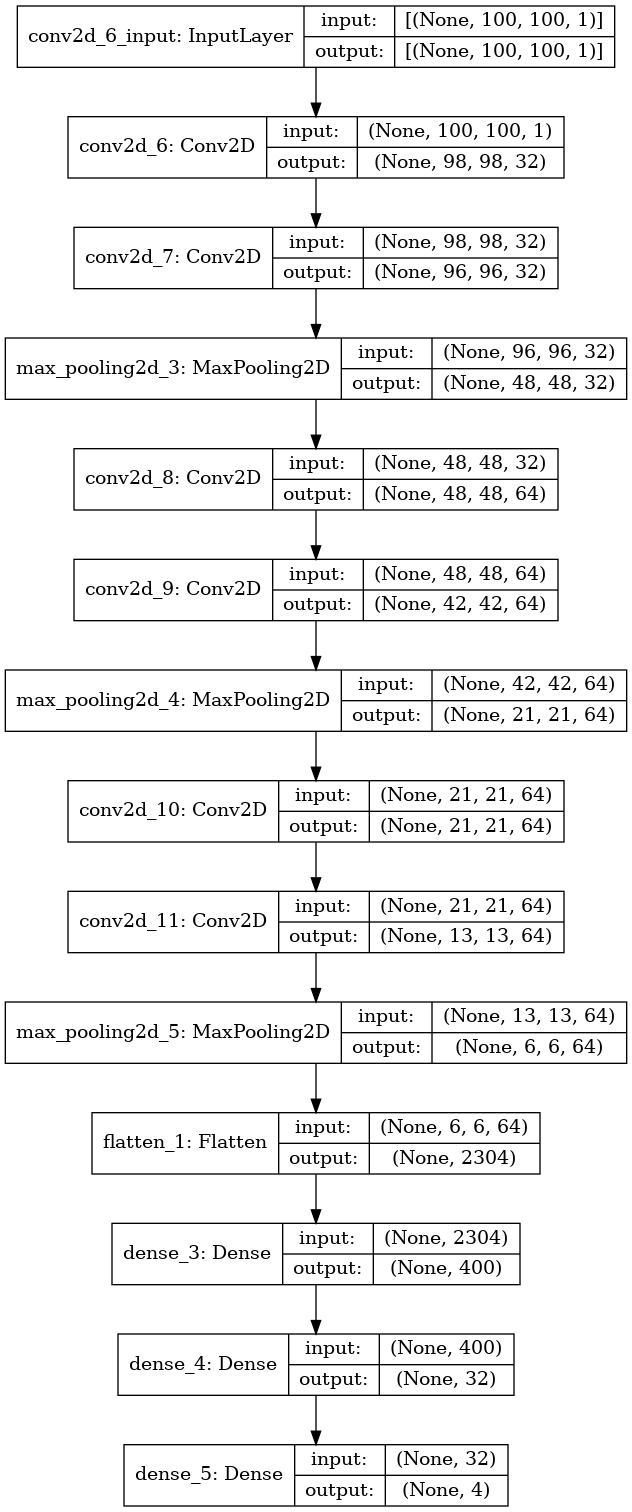

In [59]:
from keras.utils import plot_model
plot_model(model, show_shapes=True)

## Demonstration :

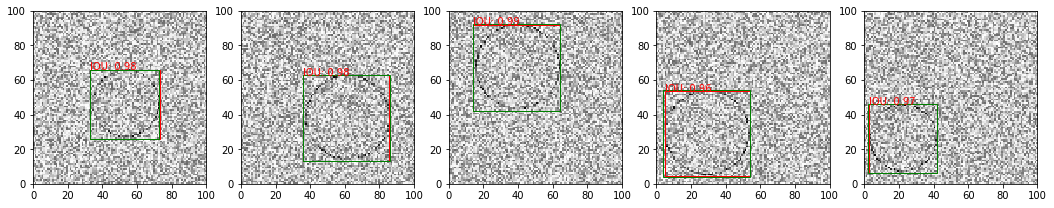

In [63]:
plt.figure(figsize=(18, 12))
for i_subplot in range(1, 6):
    plt.subplot(1, 5, i_subplot)
    i = np.random.randint(len(x_test))
    plt.imshow((test_images)[i].T, cmap='Greys', interpolation='none', origin='lower', extent=[0, image_size, 0, image_size])
    for pred_bbox, exp_bbox in zip(bbox_pred[i], test_box[i]):
        plt.gca().add_patch(matplotlib.patches.Rectangle((pred_bbox[0], pred_bbox[1]), pred_bbox[2], pred_bbox[3], ec='r', fc='none'))
        plt.gca().add_patch(matplotlib.patches.Rectangle((exp_bbox[0], exp_bbox[1]), exp_bbox[2], exp_bbox[3], ec='g', fc='none'))
        plt.annotate('IOU: {:.2f}'.format(IOU(pred_bbox, exp_bbox)), (pred_bbox[0], pred_bbox[1]+pred_bbox[3]+0.2), color='r')

In [62]:
summed_IOU = 0.
for pred_bbox, test_bbox in zip(bbox_pred.reshape(-1, 4), test_box.reshape(-1, 4)):
    summed_IOU += IOU(pred_bbox, test_bbox)
mean_IOU = summed_IOU / len(bbox_pred)
mean_IOU

0.9603336493369152